In [106]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
df_1 = pd.read_csv('/Users/fulyaakgun/Desktop/github projects/house_price_pred/train1.csv')
df_2 = pd.read_csv('/Users/fulyaakgun/Desktop/github projects/house_price_pred/test.csv')

In [8]:
if 'SalePrice' not in df_2.columns:
    df_2['SalePrice'] = 0
df = pd.concat([ df_1, df_2 ], axis=0 )
df = df.set_index('Id')

In [10]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [12]:
df_null = df[df.isnull().sum()[df.isnull().sum() > 0 ].index]

In [14]:
df_null.head()

,MSZoning,LotFrontage,Alley,Utilities,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,BsmtQual,BsmtCond,...,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PoolQC,Fence,MiscFeature,SaleType
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,65.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,...,2003.0,RFn,2.0,548.0,TA,TA,NaN,NaN,NaN,WD
2,RL,80.0,NaN,AllPub,MetalSd,MetalSd,NaN,0.0,Gd,TA,...,1976.0,RFn,2.0,460.0,TA,TA,NaN,NaN,NaN,WD
3,RL,68.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,...,2001.0,RFn,2.0,608.0,TA,TA,NaN,NaN,NaN,WD
4,RL,60.0,NaN,AllPub,Wd Sdng,Wd Shng,NaN,0.0,TA,Gd,...,1998.0,Unf,3.0,642.0,TA,TA,NaN,NaN,NaN,WD
5,RL,84.0,NaN,AllPub,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,...,2000.0,RFn,3.0,836.0,TA,TA,NaN,NaN,NaN,WD


* above shows all of the columns that have at least one NaN value

<Axes: ylabel='Id'>

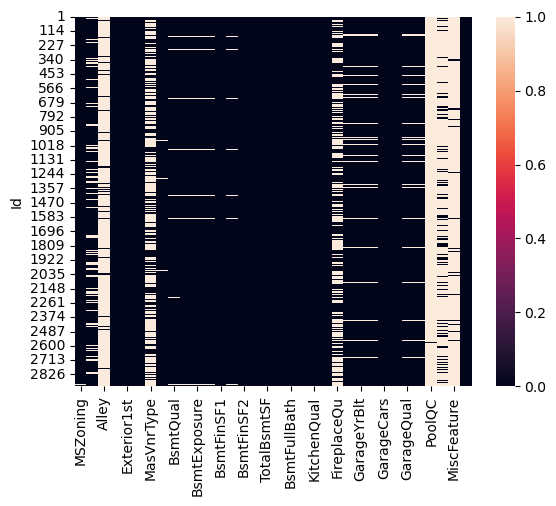

In [17]:
sns.heatmap(df_null.isnull())

* we can drop 'Alley' columns since it has too many missing values

In [20]:
df_objects = df[df.select_dtypes(include = ['object']).columns] #you have to write .columns to extract df
df_objects

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
4,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
5,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,...,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,NaN,NaN,NaN,NaN,Y,NaN,NaN,NaN,WD,Normal
2916,RM,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,...,CarPort,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
2917,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,...,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml


### First dealing with the NaN values of the objects columns:

In [23]:
df = df.drop(df[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis =1 )

In [25]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [27]:
df_objects = df_objects.drop(df_objects[df_objects.isna().sum()[df_objects.isna().sum() > 1100].index], axis = 1)
df_objects = df_objects.fillna('null')
df_objects_encoded = pd.get_dummies(df_objects)

In [29]:
df_objects['Utilities'].value_counts()

Utilities
AllPub    2916
null         2
NoSeWa       1
Name: count, dtype: int64

In [31]:
df_objects_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MSZoning_null,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,...,SaleType_New,SaleType_Oth,SaleType_WD,SaleType_null,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
2,False,False,False,True,False,False,False,True,False,False,...,False,False,True,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False
4,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,True,False,False,False,False,False
5,False,False,False,True,False,False,False,True,True,False,...,False,False,True,False,False,False,False,False,True,False


### Encoding Explanation:
* if value exists its 1-True and other columns are 0-False. 
* encoding creates new columns for that many values a column has. for ex: utilities column has 3 values ( Allpub,null,Nosewa) so 3 new columns

## For the null columns: ( optional )
* only if other columns are False, then null column will be True:
    * we do not have to extensively mention this ti the model, so we delete these columns.

In [35]:
for i in df_objects_encoded.columns:
    if 'null' in i:
        df_objects_encoded = df_objects_encoded.drop(i , axis = 1)
        print(i)

MSZoning_null
Utilities_null
Exterior1st_null
Exterior2nd_null
BsmtQual_null
BsmtCond_null
BsmtExposure_null
BsmtFinType1_null
BsmtFinType2_null
Electrical_null
KitchenQual_null
Functional_null
GarageType_null
GarageFinish_null
GarageQual_null
GarageCond_null
SaleType_null


In [37]:
new_df = pd.concat([df,df_objects_encoded] , axis = 1)
new_df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,True,False,False,False,False,True,False
2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,False,False,False,True,False,False,False,False,True,False
3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,False,False,False,True,False,False,False,False,True,False
4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,False,False,False,True,True,False,False,False,False,False
5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,False,False,False,True,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2915,160,RM,21.0,1936,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,True,False,False,False,False,True,False
2916,160,RM,21.0,1894,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,True,True,False,False,False,False,False
2917,20,RL,160.0,20000,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,False,False,False,True,True,False,False,False,False,False


## Now we want to get not object columns:

In [40]:
new_df = new_df.drop(df.select_dtypes(include = ['object']), axis = 1)

In [42]:
new_df.isna().sum()[new_df.isna().sum()>0]

LotFrontage     486
MasVnrArea       23
BsmtFinSF1        1
BsmtFinSF2        1
BsmtUnfSF         1
TotalBsmtSF       1
BsmtFullBath      2
BsmtHalfBath      2
GarageYrBlt     159
GarageCars        1
GarageArea        1
dtype: int64

### there are many NaN values we have to dealo with:
* some we will fill with its mode
* some we sill fill with its mean (columns mean)


In [45]:
mode_columns = ['GarageCars','GarageYrBlt','BsmtFullBath','BsmtHalfBath']
mean_columns = ['LotFrontage','MasVnrArea','BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','GarageArea']

In [47]:
for i in mode_columns:
    new_df[i] = new_df[i].fillna(new_df[i].mode()[0])

for j in mean_columns:
    new_df[j] = new_df[j].fillna(np.round(new_df[j].mean()))

In [49]:
new_df.isna().sum()[new_df.isna().sum() > 0]

Series([], dtype: int64)

## We merged training and test data before doing EDA. So we will split them again.

In [52]:
training_data = new_df[0:len(df_1)]
test_data = new_df[len(df_1):]
testing_data = test_data.drop(columns = 'SalePrice')

In [123]:
conda install -c conda-forge xgboost

Retrieving notices: done
Channels:
 - conda-forge
 - defaults
Platform: osx-arm64
Solving environment: done

## Package Plan ##

  environment location: /opt/anaconda3

  added / updated specs:
    - xgboost


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    _py-xgboost-mutex-2.0      |            cpu_0          12 KB  conda-forge
    conda-25.1.0               |  py312h81bd7bf_0         1.1 MB  conda-forge
    libcxx-19.1.7              |       ha82da77_0         511 KB  conda-forge
    libxgboost-2.1.3           |   cpu_h549eda0_1         1.3 MB  conda-forge
    llvm-openmp-19.1.7         |       hdb05f8b_0         274 KB  conda-forge
    py-xgboost-2.1.3           | cpu_pyh1ce2f49_1         131 KB  conda-forge
    xgboost-2.1.3              | cpu_pyhc1a9e11_1          15 KB  conda-forge
    ------------------------------------------------------------
                                   

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

### We will split traning data into 80% training 20% validation 

In [83]:
X = training_data.drop(columns = 'SalePrice') # not added 'inplace=True, doesn't change original data!
y = training_data['SalePrice']
print(y.shape)
X_train,X_test,y_train,y_test = train_test_split(X, y ,test_size = 0.2)
#y_train = np.reshape(y_train,(-1,1))
#y_test = np.reshape(y_train,(-1,1))
print(y_train.shape)
print(y_test.shape)

(1460,)
(1168,)
(292,)


# Fitting the Models:

In [98]:
model_1 = LinearRegression()
model_1.fit(X,y)
y_pred = model_1.predict(X_test)
mean_squared_error(y_test,y_pred)

627296006.6714963

In [110]:
model_2 = XGBRegressor(n_estimators = 1000, learning_rate = 0.1)
model_2.fit(X,y)
y_pred = model_2.predict(X_test)
mean_squared_error(y_test,y_pred)

3728.882977577105

In [102]:
model_3 = RandomForestRegressor(n_estimators = 100)
model_3.fit(X,y)
y_pred = model_3.predict(X_test)
mean_squared_error(y_test,y_pred)

217244160.15834075

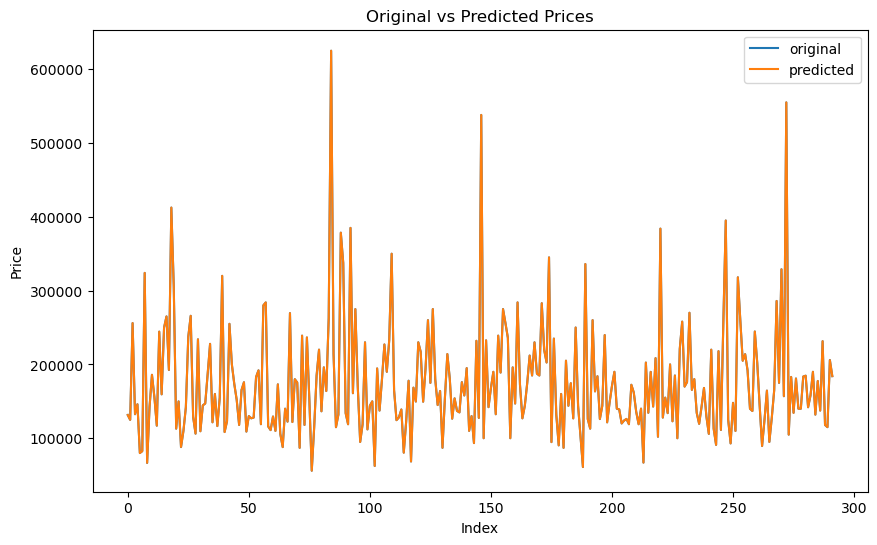

In [112]:
sort_indices = np.argsort(y_test) #for xgboost

#Plot
plt.figure(figsize=(10,6))
plt.plot(np.arange(len(y_test)),y_test, label = 'original')
plt.plot(np.arange(len(y_test)),y_pred, label = 'predicted')
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Original vs Predicted Prices')
plt.legend()
plt.show()

## We choosed XGB model since lowest MSE

In [115]:
pred = model_2.predict(testing_data)

final = pd.DataFrame()
final['id'] = testing_data.index
final['SalePrice'] = pred

#write DataFrame to csv without index:
final.to_csv('output.csv',index = False)